In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools as tools
import matplotlib.pyplot as plt

importování knihoven, načtení do dataframu

In [2]:
data = pd.read_csv("mzdy_inflace.csv")
data


,rok,mzda,inflace
0,2016,30960,0.7
1,2017,33236,2.5
2,2018,35909,2.1
3,2019,38254,2.8
4,2020,39166,3.2
5,2021,41552,3.8
6,2022,45184,15.1
7,2023,48567,10.7
8,2024,52397,2.4


regresní model = na základě inflace a roku ti řeknu mzdu

In [3]:
model = smf.ols(formula="mzda ~ rok + inflace", data=data).fit()

In [4]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mzda   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 27 May 2025   Prob (F-statistic):           6.69e-06
Time:                        12:16:02   Log-Likelihood:                -74.157
No. Observations:                   9   AIC:                             154.3
Df Residuals:                       6   BIC:                             154.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.261e+06   3.52e+05    -14.941      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


-kazdy rok pridava v prumeru 2624 Kc k mesicni mzde(za predpokladu ze je inflace stejna)    
-kazde 1% inflace je -66Kc na mzde, tzn inflace na mzdy nema dopad
-multikolinearita -  tezko rozlisit vliv inflace a casu(a taky malo dat)

---rika mi to ze v mym modelu platy proste rostou stabilne v case bez ohledu na inflaci

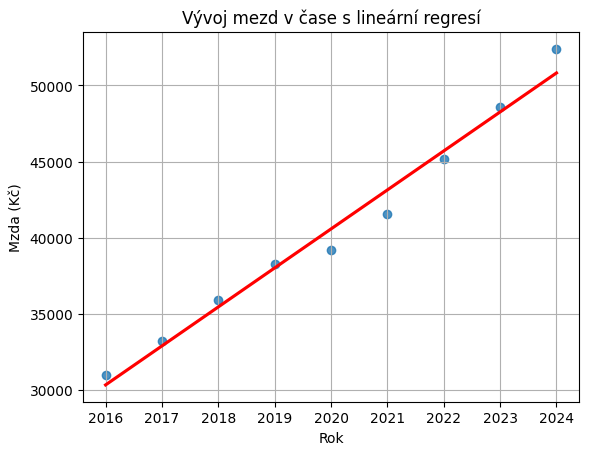

In [5]:
sns.regplot(data=data, x="rok", y="mzda", line_kws={"color": "red"}, ci=None)
plt.title("Vývoj mezd v čase s lineární regresí")
plt.xlabel("Rok")
plt.ylabel("Mzda (Kč)")
plt.grid()
plt.show()

In [6]:
future = pd.DataFrame({
    "rok": [2025, 2026, 2027, 2028, 2029, 2030],
    "inflace": [2.5, 2.0, 2.0, 2.0, 2.0, 2.0]  # vlastní odhady, jinak by se musel udelat jeste model na predickci inflace
    
})


In [7]:
future["predikovana_mzda"] = model.predict(future)
print(future)


    rok  inflace  predikovana_mzda
0  2025      2.5      53856.530506
1  2026      2.0      56514.235452
2  2027      2.0      59138.720393
3  2028      2.0      61763.205335
4  2029      2.0      64387.690277
5  2030      2.0      67012.175218


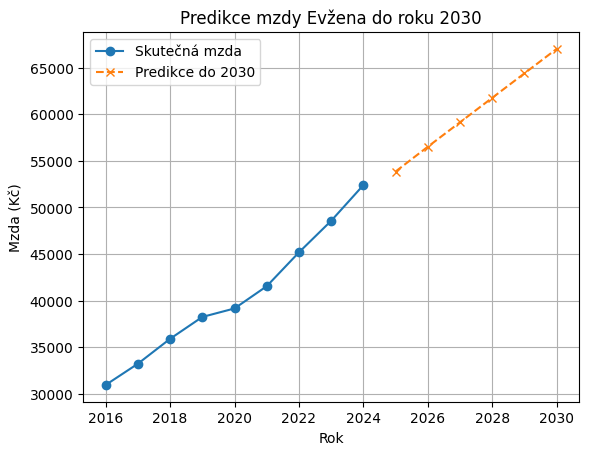

In [8]:
plt.plot(data["rok"], data["mzda"], marker='o', label="Skutečná mzda")
plt.plot(future["rok"], future["predikovana_mzda"], marker='x', linestyle='--', label="Predikce do 2030")
plt.xlabel("Rok")
plt.ylabel("Mzda (Kč)")
plt.title("Predikce mzdy Evžena do roku 2030")
plt.legend()
plt.grid()
plt.show()
